In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

data_file = '/Volumes/Passport/kaggle/training_set.csv'
meta_data_file = '/Volumes/Passport/kaggle/training_set_metadata.csv'
with open(data_file, newline='') as csvfile:
    db = pd.read_csv(csvfile)
with open(meta_data_file, newline='') as csvfile:
    mdb = pd.read_csv(csvfile)

db = pd.merge(db, mdb, on="object_id")

In [2]:
filter_numbers = [0,1,2,3,4,5]
filter_labels = ['u','g','r','i','z','y']
filter_colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow']
zpts = [26.5,28.3,28.13,27.79,27.4,26.58]
def plot_nice(t,f,err,filters,detected,distmod):
    for num in filter_numbers:
        gind = np.where((filters*1.==num) & (detected==1))
        tmax = t[np.argmax(f)]
        if len(t[gind])>0:
            mag = -2.5*np.log10(f[gind]) + zpts[num] - distmod
            #plt.errorbar(t[gind],mag,yerr=err[gind],color=filter_colors[num])
            plt.plot(t[gind]-tmax,mag,
                     '-',color=filter_colors[num])
        gind = np.where((filters*1.==num) & (detected==0))
        if len(t[gind])>0:
            mag = -2.5*np.log10(f[gind]) + zpts[num] - distmod
            #plt.plot(t[gind],mag,'v',color=filter_colors[num],alpha=0.1)

/Users/ashley/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


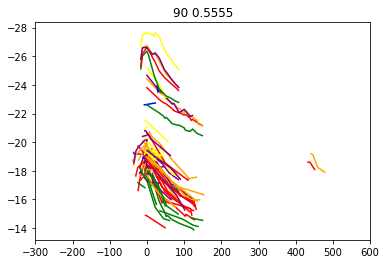

In [20]:
for i,ndb in db.groupby('target'):
    ndb = ndb.fillna(0.0)
    if i!=90:
        continue
    for thing in np.arange(30):
        id_to_use = np.random.choice(
            np.unique(ndb['object_id'].values))
        gdb = ndb.where(ndb['object_id']==id_to_use).dropna()
        if gdb.empty:
            continue
        t = gdb['mjd'].values
        f = gdb['flux'].values
        err = gdb['flux_err'].values
        filt = gdb['passband']
        detected = gdb['detected']
        z = gdb['hostgal_specz'].values[0]
        distmod = gdb['distmod'].values[0]
        if np.isnan(z):
            z = 0.0
            distmod = 0.0
        plot_nice((t)*(1.+z),f,err,filt,detected,distmod)
        plt.title(str(i)+' '+str(z))
plt.xlim([-300,600])
plt.gca().invert_yaxis()
plt.show()